In [1]:
# initialisation
import pandas as pd # for df manipulation
import numpy as np # calcul
import matplotlib.pyplot as plt #plot
import seaborn as sns # plot  
import os               # manage files in the code. Note that the code is made on Windows so if you are using Mac 
from os import listdir  # you may need to change the name of the paths so that they are comform to Mac paths.
import warnings # not showing unecessary warnings
warnings.simplefilter("ignore")
sns.set_theme()

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Room-2243" data-toc-modified-id="Openface-data">Room 2243</a></span>
    <ul class="toc-item"><li><span><a href="#1.-Blink-rate-and-Pupil-data" data-toc-modified-id="1. Blink rate and Pupil data">1. Blink rate and Pupil data</a></span></li><li><span><a href="#2.-Eyes-and-Head-direction-(Room-2243)" data-toc-modified-id="2. Eyes and Head direction (Room 2243)">2. Eyes and Head direction (Room 2243)</a></span></li></ul></li></ul><ul class="toc-item"><li><span><a href="#Room-2229" data-toc-modified-id="Openface-data">Room 2229</a></span>
    <ul class="toc-item"><li><span><a href="#1.-Blink-rate-and-Pupil-" data-toc-modified-id="1. Blink rate and Pupil data">1. Blink rate and Pupil </a></span></li><li><span><a href="#2.-Eyes-and-Head-direction-(Room-2229)" data-toc-modified-id="2. Eyes and Head direction (Room 2229)">2. Eyes and Head direction (Room 2229)</a></span></li></ul></li></ul>
    <ul class="toc-item"><li><span><a href="#Room-2243-vs-Room-2229" data-toc-modified-id="Room 2243 vs Room 2229">Room 2243 vs Room 2229</a></span><ul class="toc-item"><li><span><a href="#1.-Blink-rate-analysis" data-toc-modified-id="1. Blink rate analysis">1. Blink rate analysis</a></span></li><li><span><a href="#2.-Pupil-size-analysis" data-toc-modified-id="2. Pupil size analysis">2. Pupil size analysis</a></span></li><li><span><a href="#3.-Eyes-vs-head-direction-comparison" data-toc-modified-id="3. Eyes vs head direction comparison">3. Eyes vs head direction comparison</a></span></li></ul></li></ul><ul class="toc-item"><li><span><a href="#Survey-analysis" data-toc-modified-id="Survey analysis">Survey analysis</a></span><ul class="toc-item"><li><span><a href="#1.-Glare-Analysis" data-toc-modified-id="1. Glare Analysis">1. Glare Analysis</a></span></li></ul></li></ul></div>

# Room 2243

## 1. Blink rate and Pupil data

In [2]:
# Importation of the data

In [3]:
# get the file 
FILES=listdir('2243')
# add the name of the folder
FILES_2243=['2243//'+ f for f in FILES]

In [4]:
# Loading library 
from Function.start_time import start_time
from Function.pupil_sizes import pupil_size
from Function.test_stats import test_stat

df_stat_2243=[]
i=1
for FILE in FILES_2243:
    # loading datasets
    df = pd.read_csv(FILE)
    FILE_=FILE.replace("2243//","")
    df["Openface_file"] = FILE_
    room=2243
    df_=start_time(FILE_,room,df)
    # Pupil size calculation
    df_pupil_size=pupil_size(df_)
    
    # Mapping all the tests :
    
    bh=pd.read_excel("Data//BP_Results_by_hand_v3_2021-11-12.xlsx")
    currentfile=bh[bh["Openface_file"]==FILE_]
    
    df__=df_[df_[' success']==1]
    df_withsubject=df__[df__[' confidence']>0.95] 
    ratio_kept=(df_withsubject.shape[0]/df_.shape[0])*100
    
    df_merge=df_.merge(currentfile,on="Openface_file")
    
    df_stat=test_stat(df_merge,df_withsubject,FILE_)
    df_stat["ratio_kept_rows"]=ratio_kept
    df_stat["Number of rows total"]=df_.shape[0]
    df_stat["Number of rows kept"]=df_.shape[0]*ratio_kept/100
    df_stat_2243.append(df_stat.T)
    i=i++1

In [5]:
df_stat_2243_=pd.concat(df_stat_2243,axis=1).T

In [6]:
print("Ratio kept for all data (Room 2243):",df_stat_2243_["Number of rows kept"].sum(axis=0)/df_stat_2243_["Number of rows total"].sum(axis=0)*100,"%")

Ratio kept for all data (Room 2243): 58.784693953075276 %


## 2. Eyes and Head direction (Room 2243)

First we can make a dataset regrouping the mean for both eyes and head direction features,for each test  and each csv

In [7]:
#mGet the mean for each test for room 2243
def center_quantile10_90(x,q10,q90):
    return x<=q90 and x>=q10
df_mean_all_2243 = pd.DataFrame()
for file in FILES_2243:
    # same methods than for one file but for all the files
    df = pd.read_csv(file)
    df_=df[df[' success']==1]
    df_withsubject=df_[df_[' confidence']>0.95] 
    COLUMNS_VECTOR=[' gaze_angle_x', ' gaze_angle_y', ' pose_Rx', ' pose_Ry']
    df_ws=df_withsubject[COLUMNS_VECTOR]
    df_ws_deg=df_ws.copy()*180/np.pi
    q10=df_ws_deg[' pose_Rx'].quantile(q=0.10)
    q90=df_ws_deg[' pose_Rx'].quantile(q=0.90)
    mask1=df_ws_deg[' pose_Rx'].apply(lambda x : center_quantile10_90(x,q10,q90))
    q10=df_ws_deg[' pose_Ry'].quantile(q=0.10)
    q90=df_ws_deg[' pose_Ry'].quantile(q=0.90)
    mask_y1=df_ws_deg[' pose_Ry'].apply(lambda x : center_quantile10_90(x,q10,q90))
    q10=df_ws_deg[' gaze_angle_x'].quantile(q=0.10)
    q90=df_ws_deg[' gaze_angle_x'].quantile(q=0.90)
    mask_x2=df_ws_deg[' gaze_angle_x'].apply(lambda x : center_quantile10_90(x,q10,q90))
    q10=df_ws_deg[' gaze_angle_y'].quantile(q=0.10)
    q90=df_ws_deg[' gaze_angle_y'].quantile(q=0.90)
    mask_y2=df_ws_deg[' gaze_angle_y'].apply(lambda x : center_quantile10_90(x,q10,q90))
    df_ws_deg['diff_eyes_head_y [deg]']=df_ws_deg[' pose_Rx']-df_ws_deg[' gaze_angle_y']
    df_ws_deg['diff_eyes_head_x [deg]']=df_ws_deg[' pose_Ry']-df_ws_deg[' gaze_angle_x']
    q10=df_ws_deg['diff_eyes_head_x [deg]'].quantile(q=0.10)
    q90=df_ws_deg['diff_eyes_head_x [deg]'].quantile(q=0.90) 
    mask_diff_x=df_ws_deg['diff_eyes_head_x [deg]'].apply(lambda x : center_quantile10_90(x,q10,q90))
    q10=df_ws_deg['diff_eyes_head_y [deg]'].quantile(q=0.10)
    q90=df_ws_deg['diff_eyes_head_y [deg]'].quantile(q=0.90)
    mask_diff_y=df_ws_deg['diff_eyes_head_y [deg]'].apply(lambda x : center_quantile10_90(x,q10,q90))
    
    df_mean = pd.DataFrame(index={file},data={
                'Axis_y_head' : df_ws_deg[mask1][' pose_Rx'].describe()['mean'],
                'Axis_y_eyes' : df_ws_deg[mask_y1][' gaze_angle_y'].describe()['mean'], 
                'Axis_x_head' : df_ws_deg[mask_x2][' pose_Ry'].describe()['mean'],
                'Axis_x_eyes' : df_ws_deg[mask_y2][' gaze_angle_x'].describe()['mean'], 
                'Axis_y_diff' : df_ws_deg[mask_diff_y]['diff_eyes_head_y [deg]'].describe()['mean'],
                'Axis_x_diff' : df_ws_deg[mask_diff_x]['diff_eyes_head_x [deg]'].describe()['mean']})

    df_mean_all_2243=df_mean_all_2243.append(df_mean)

In [8]:
df_mean_all_2243.head(3)

,Axis_y_head,Axis_y_eyes,Axis_x_head,Axis_x_eyes,Axis_y_diff,Axis_x_diff
2243//webcam_2021-05-25-14-13.csv,12.286560,16.732433,-5.145247,4.947059,-4.541093,-9.616670
2243//webcam_2021-05-25-15-00.csv,14.080828,16.386446,0.595117,0.592920,-2.054858,-0.427335
2243//webcam_2021-05-25-16-28.csv,17.948165,21.451406,6.449382,-3.694261,-2.895564,10.632473


Then we can make an other dataset which simply regroup all our csv together and study the movement of the eyes / head for all our data

In [9]:
# make one big file with all the frame taken in Room 2243
df_ws_deg_full_2243 = pd.DataFrame()
for file in FILES_2243:
    df = pd.read_csv(file,low_memory=False)
    df_=df[df[' success']==1]
    df_withsubject=df_[df_[' confidence']>0.95] # comment définir la confidence quon veut 
    COLUMNS_VECTOR=[' gaze_angle_x', ' gaze_angle_y', ' pose_Rx', ' pose_Ry']
    df_ws=df_withsubject[COLUMNS_VECTOR]
    df_ws_deg=df_ws*180/np.pi
    df_ws_deg_full_2243 = df_ws_deg_full_2243.append(df_ws_deg, ignore_index=True)
print("We have a ",df_ws_deg_full_2243.shape[0]," rows for the room 2243")
df_ws_deg_full_2243.head(3)

We have a  555968  rows for the room 2243


,gaze_angle_x,gaze_angle_y,pose_Rx,pose_Ry
0,7.448451,33.976397,26.699833,-3.896113
1,7.792226,38.273581,29.908397,-7.047381
2,8.594367,40.909187,33.002369,-9.281916


# Room 2229

## 1. Blink rate and Pupil 

In [10]:
# Importation of the data

In [11]:
# get the file 
FILES=listdir('2229')

In [12]:
# add the name of the folder
FILES_2229=['2229//'+ f for f in FILES]

In [13]:
# Loading library 
from Function.start_time import start_time
from Function.pupil_sizes import pupil_size
from Function.test_stats import test_stat

df_stat_2229=[]
i=1
for FILE in FILES_2229:
    # loading datasets
    df = pd.read_csv(FILE)
    FILE_=FILE.replace("2229//","")
    df["Openface_file"] = FILE_
    room=2229
    df_=start_time(FILE_,room,df)
    # Pupil size calculation
    df_pupil_size=pupil_size(df_)
    
    # Mapping all the tests :
    
    bh=pd.read_excel("Data//BP_Results_by_hand_v3_2021-11-12.xlsx")
    currentfile=bh[bh["Openface_file"]==FILE_]
    
    df__=df_[df_[' success']==1]
    df_withsubject=df__[df__[' confidence']>0.95] 
    ratio_kept=(df_withsubject.shape[0]/df_.shape[0])*100
    
    df_merge=df_.merge(currentfile,on="Openface_file")
    
    df_stat=test_stat(df_merge,df_withsubject,FILE_)
    df_stat["ratio_kept_rows"]=ratio_kept
    df_stat["Number of rows total"]=df_.shape[0]
    df_stat["Number of rows kept"]=df_.shape[0]*ratio_kept/100
    df_stat_2229.append(df_stat.T)
    i=i++1

In [14]:
df_stat_2229_=pd.concat(df_stat_2229,axis=1).T

In [15]:
print("Ratio kept for all data (Room 2229):",df_stat_2229_["Number of rows kept"].sum(axis=0)/df_stat_2229_["Number of rows total"].sum(axis=0)*100,"%")

Ratio kept for all data (Room 2229): 47.59393719234825 %


In [16]:
print("Ratio kept for all data (both rooms):",(df_stat_2229_["Number of rows kept"].sum(axis=0)+df_stat_2243_["Number of rows kept"].sum(axis=0))/(df_stat_2229_["Number of rows total"].sum(axis=0)+df_stat_2243_["Number of rows total"].sum(axis=0))*100,"%")

Ratio kept for all data (both rooms): 52.18431274580729 %


In [17]:
df_stat_2229_.head(1)

,Survey 1 Dmean pupil,Cognitive test 1 Dmean pupil,Cognitive test 2 Dmean pupil,Cognitive test 3 Dmean pupil,Creative test Dmean pupil,Survey 2 Dmean pupil,Blink mean Survey 1,Total time of Survey 1,Ratio kept Survey 1,Blink mean Cognitive test 1,...,Total time of Creative test,Ratio kept Creative test,Blink mean Survey 2,Total time of Survey 2,Ratio kept Survey 2,exposure_nr,session_ID,ratio_kept_rows,Number of rows total,Number of rows kept
webcam_2021-05-25-14-05.csv,5.184129,5.325886,5.427237,5.267589,5.305594,5.136859,2.015176,3 min0 sec,82.70577933450087,14.459235,...,5 min6 sec,93.57867067217424,0.55287,3 min50 sec,94.36929320257018,308_NG_1_Blurr,15,69.397059,68000,47190.0


## 2. Eyes and Head direction (Room 2229)

First we can make a dataset regrouping the mean for both eyes and head direction features,for each test  and each csv

In [18]:
#mGet the mean for each test for room 2229
def center_quantile10_90(x,q10,q90):
    return x<=q90 and x>=q10
df_mean_all_2229 = pd.DataFrame()
for file in FILES_2229:
    df = pd.read_csv(file)
    df_=df[df[' success']==1]
    df_withsubject=df_[df_[' confidence']>0.95] 
    COLUMNS_VECTOR=[' gaze_angle_x', ' gaze_angle_y', ' pose_Rx', ' pose_Ry']
    df_ws=df_withsubject[COLUMNS_VECTOR]
    df_ws_deg=df_ws.copy()*180/np.pi
    q10=df_ws_deg[' pose_Rx'].quantile(q=0.10)
    q90=df_ws_deg[' pose_Rx'].quantile(q=0.90)
    mask1=df_ws_deg[' pose_Rx'].apply(lambda x : center_quantile10_90(x,q10,q90))
    q10=df_ws_deg[' pose_Ry'].quantile(q=0.10)
    q90=df_ws_deg[' pose_Ry'].quantile(q=0.90)
    mask_y1=df_ws_deg[' pose_Ry'].apply(lambda x : center_quantile10_90(x,q10,q90))
    q10=df_ws_deg[' gaze_angle_x'].quantile(q=0.10)
    q90=df_ws_deg[' gaze_angle_x'].quantile(q=0.90)
    mask_x2=df_ws_deg[' gaze_angle_x'].apply(lambda x : center_quantile10_90(x,q10,q90))
    q10=df_ws_deg[' gaze_angle_y'].quantile(q=0.10)
    q90=df_ws_deg[' gaze_angle_y'].quantile(q=0.90)
    mask_y2=df_ws_deg[' gaze_angle_y'].apply(lambda x : center_quantile10_90(x,q10,q90))
    df_ws_deg['diff_eyes_head_y [deg]']=df_ws_deg[' pose_Rx']-df_ws_deg[' gaze_angle_y']
    df_ws_deg['diff_eyes_head_x [deg]']=df_ws_deg[' pose_Ry']-df_ws_deg[' gaze_angle_x']
    q10=df_ws_deg['diff_eyes_head_x [deg]'].quantile(q=0.10)
    q90=df_ws_deg['diff_eyes_head_x [deg]'].quantile(q=0.90) 
    mask_diff_x=df_ws_deg['diff_eyes_head_x [deg]'].apply(lambda x : center_quantile10_90(x,q10,q90))
    q10=df_ws_deg['diff_eyes_head_y [deg]'].quantile(q=0.10)
    q90=df_ws_deg['diff_eyes_head_y [deg]'].quantile(q=0.90)
    mask_diff_y=df_ws_deg['diff_eyes_head_y [deg]'].apply(lambda x : center_quantile10_90(x,q10,q90))
    
    df_mean = pd.DataFrame(index={file},data={
                'Axis_y_head' : df_ws_deg[mask1][' pose_Rx'].describe()['mean'],
                'Axis_y_eyes' : df_ws_deg[mask_y1][' gaze_angle_y'].describe()['mean'], 
                'Axis_x_head' : df_ws_deg[mask_x2][' pose_Ry'].describe()['mean'],
                'Axis_x_eyes' : df_ws_deg[mask_y2][' gaze_angle_x'].describe()['mean'], 
                'Axis_y_diff' : df_ws_deg[mask_diff_y]['diff_eyes_head_y [deg]'].describe()['mean'],
                'Axis_x_diff' : df_ws_deg[mask_diff_x]['diff_eyes_head_x [deg]'].describe()['mean']})

    df_mean_all_2229=df_mean_all_2229.append(df_mean)

In [19]:
df_mean_all_2229.head(1)

,Axis_y_head,Axis_y_eyes,Axis_x_head,Axis_x_eyes,Axis_y_diff,Axis_x_diff
2229//webcam_2021-05-25-14-05.csv,12.990836,16.044299,-0.350608,1.812977,-2.741253,-2.280999


Then we can make an other dataset which simply regroup all our csv together and study the movement of the eyes / head for all our data

In [20]:
# make one big file with all the frame taken in Room 2229
df_ws_deg_full_2229 = pd.DataFrame()
for file in FILES_2229:
    df = pd.read_csv(file,low_memory=False)
    df_=df[df[' success']==1]
    df_withsubject=df_[df_[' confidence']>0.95] # comment définir la confidence quon veut 
    COLUMNS_VECTOR=[' gaze_angle_x', ' gaze_angle_y', ' pose_Rx', ' pose_Ry']
    df_ws=df_withsubject[COLUMNS_VECTOR]
    df_ws_deg=df_ws*180/np.pi
    df_ws_deg_full_2229 = df_ws_deg_full_2229.append(df_ws_deg, ignore_index=True)
print("We have a ",df_ws_deg_full_2229.shape[0]," rows")
df_ws_deg_full_2229.head(2)

We have a  647229  rows


,gaze_angle_x,gaze_angle_y,pose_Rx,pose_Ry
0,-7.104677,3.896113,1.890761,9.568395
1,-5.042029,1.031324,1.432394,9.568395


# Room 2243 vs Room 2229

## 1. Blink rate analysis

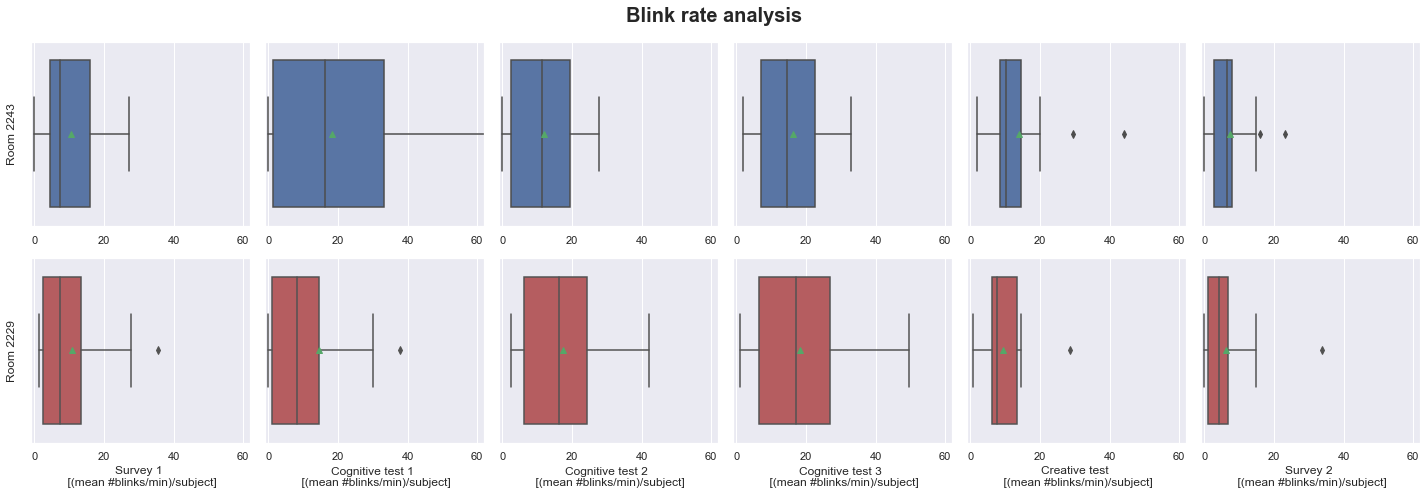

In [21]:
# plot
fig = plt.figure(figsize=[20,7])
plt.suptitle('Blink rate analysis',fontsize=20,fontweight='bold')
ax1 = fig.add_subplot(261)
ax2 = fig.add_subplot(262)
ax3 = fig.add_subplot(263)
ax4 = fig.add_subplot(264)
ax5 = fig.add_subplot(265)
ax6 = fig.add_subplot(266)
ax7 = fig.add_subplot(267)
ax8 = fig.add_subplot(268)
ax9 = fig.add_subplot(269)
ax10 = fig.add_subplot(2,6,10)
ax11 = fig.add_subplot(2,6,11)
ax12 = fig.add_subplot(2,6,12)

sns.boxplot(x=df_stat_2243_["Blink mean Survey 1"],data=df_stat_2243_,color="b",ax=ax1,showmeans=True).set(ylabel='Room 2243',xlabel="",xlim=[-1,62])
sns.boxplot(x=df_stat_2229_["Blink mean Survey 1"],data=df_stat_2229_,color="r",ax=ax7,showmeans=True).set(xlabel="Survey 1 \n [(mean #blinks/min)/subject]",ylabel='Room 2229',xlim=[-1,62])

sns.boxplot(x=df_stat_2243_["Blink mean Cognitive test 1"],data=df_stat_2243_,color="b",ax=ax2,showmeans=True).set(xlabel='',xlim=[-1,62])
sns.boxplot(x=df_stat_2229_["Blink mean Cognitive test 1"],data=df_stat_2229_,color="r",ax=ax8,showmeans=True).set(xlabel="Cognitive test 1 \n [(mean #blinks/min)/subject]",xlim=[-1,62])

sns.boxplot(x=df_stat_2243_["Blink mean Cognitive test 2"],data=df_stat_2243_,color="b",ax=ax3,showmeans=True).set(xlabel='',xlim=[-1,62])
sns.boxplot(x=df_stat_2229_["Blink mean Cognitive test 2"],data=df_stat_2229_,color="r",ax=ax9,showmeans=True).set(xlabel="Cognitive test 2 \n [(mean #blinks/min)/subject]",xlim=[-1,62])

sns.boxplot(x=df_stat_2243_["Blink mean Cognitive test 3"],data=df_stat_2243_,color="b",ax=ax4,showmeans=True).set(xlabel='',xlim=[-1,62])
sns.boxplot(x=df_stat_2229_["Blink mean Cognitive test 3"],data=df_stat_2229_,color="r",ax=ax10,showmeans=True).set(xlabel="Cognitive test 3 \n [(mean #blinks/min)/subject]",xlim=[-1,62])

sns.boxplot(x=df_stat_2243_["Blink mean Creative test"],data=df_stat_2243_,color="b",ax=ax5,showmeans=True).set(xlabel='',xlim=[-1,62])
sns.boxplot(x=df_stat_2229_["Blink mean Creative test"],data=df_stat_2229_,color="r",ax=ax11,showmeans=True).set(xlabel="Creative test \n [(mean #blinks/min)/subject]",xlim=[-1,62])

sns.boxplot(x=df_stat_2243_["Blink mean Survey 2"],data=df_stat_2243_,color="b",ax=ax6,showmeans=True).set(xlabel='',xlim=[-1,62])
sns.boxplot(x=df_stat_2229_["Blink mean Survey 2"],data=df_stat_2229_,color="r",ax=ax12,showmeans=True).set(xlabel="Survey 2 \n [(mean #blinks/min)/subject]",xlim=[-1,62])
fig.tight_layout()
plt.savefig('Figures/BlinkRate.jpg')

In [22]:
COLUMNS_=[
       'Blink mean Survey 1',
       'Blink mean Cognitive test 1',
       'Blink mean Cognitive test 2', 
       'Blink mean Cognitive test 3', 
       'Blink mean Creative test',
       'Blink mean Survey 2']

df_stat_2243_[COLUMNS_].mean()

Blink mean Survey 1            10.593689
Blink mean Cognitive test 1    18.387269
Blink mean Cognitive test 2    12.067280
Blink mean Cognitive test 3    16.169867
Blink mean Creative test       14.021402
Blink mean Survey 2             7.502655
dtype: float64

In [23]:
df_stat_2243_[COLUMNS_].median()

Blink mean Survey 1             7.427419
Blink mean Cognitive test 1    16.299548
Blink mean Cognitive test 2    11.397870
Blink mean Cognitive test 3    14.668442
Blink mean Creative test       10.270359
Blink mean Survey 2             6.491670
dtype: float64

In [24]:
df_stat_2229_[COLUMNS_].mean()

Blink mean Survey 1            10.903778
Blink mean Cognitive test 1    14.598199
Blink mean Cognitive test 2    17.467521
Blink mean Cognitive test 3    18.267351
Blink mean Creative test        9.317222
Blink mean Survey 2             6.314165
dtype: float64

In [25]:
df_stat_2229_[COLUMNS_].median()

Blink mean Survey 1             7.461248
Blink mean Cognitive test 1     8.181687
Blink mean Cognitive test 2    16.185113
Blink mean Cognitive test 3    17.093762
Blink mean Creative test        7.716411
Blink mean Survey 2             4.141583
dtype: float64

## 2. Pupil size analysis

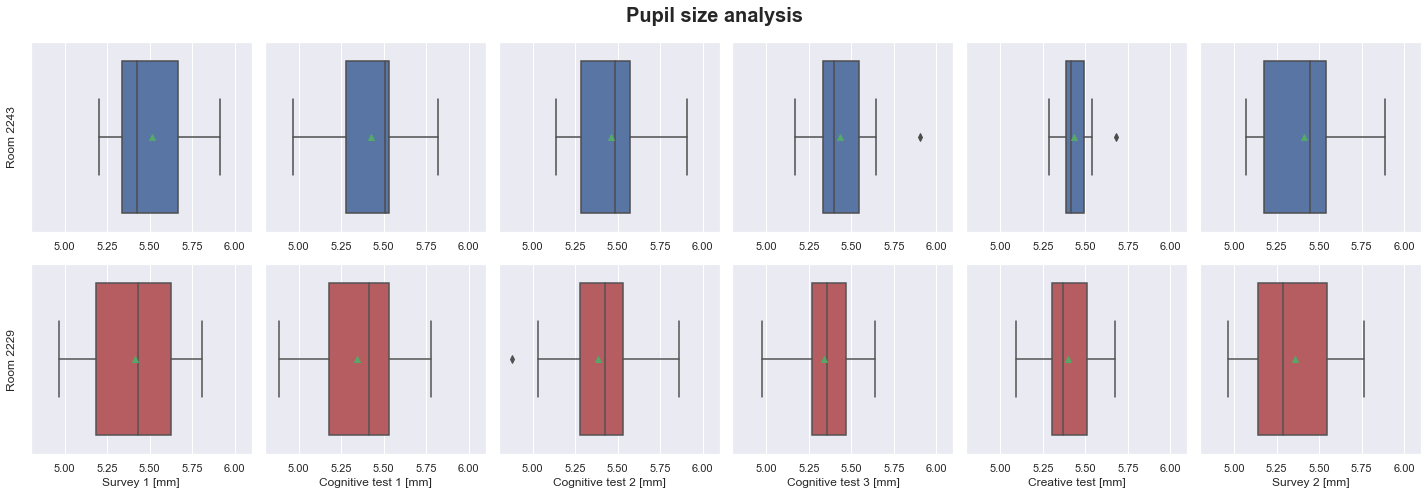

In [26]:
#plot
fig = plt.figure(figsize=[20,7])
plt.suptitle('Pupil size analysis',fontsize=20,fontweight='bold')
ax1 = fig.add_subplot(261)
ax2 = fig.add_subplot(262)
ax3 = fig.add_subplot(263)
ax4 = fig.add_subplot(264)
ax5 = fig.add_subplot(265)
ax6 = fig.add_subplot(266)
ax7 = fig.add_subplot(267)
ax8 = fig.add_subplot(268)
ax9 = fig.add_subplot(269)
ax10 = fig.add_subplot(2,6,10)
ax11 = fig.add_subplot(2,6,11)
ax12 = fig.add_subplot(2,6,12)

sns.boxplot(x=df_stat_2243_["Survey 1 Dmean pupil"],data=df_stat_2243_,color="b",ax=ax1,showmeans=True).set(ylabel='Room 2243',xlabel="",xlim=[4.8,6.1])
sns.boxplot(x=df_stat_2229_["Survey 1 Dmean pupil"],data=df_stat_2229_,color="r",ax=ax7,showmeans=True).set(xlabel="Survey 1 [mm]",ylabel='Room 2229',xlim=[4.8,6.1])

sns.boxplot(x=df_stat_2243_["Cognitive test 1 Dmean pupil"],data=df_stat_2243_,color="b",ax=ax2,showmeans=True).set(xlabel='',xlim=[4.8,6.1])
sns.boxplot(x=df_stat_2229_["Cognitive test 1 Dmean pupil"],data=df_stat_2229_,color="r",ax=ax8,showmeans=True).set(xlabel="Cognitive test 1 [mm]",xlim=[4.8,6.1])

sns.boxplot(x=df_stat_2243_["Cognitive test 2 Dmean pupil"],data=df_stat_2243_,color="b",ax=ax3,showmeans=True).set(xlabel='',xlim=[4.8,6.1])
sns.boxplot(x=df_stat_2229_["Cognitive test 2 Dmean pupil"],data=df_stat_2229_,color="r",ax=ax9,showmeans=True).set(xlabel="Cognitive test 2 [mm]",xlim=[4.8,6.1])
sns.boxplot(x=df_stat_2243_["Cognitive test 3 Dmean pupil"],data=df_stat_2243_,color="b",ax=ax4,showmeans=True).set(xlabel='',xlim=[4.8,6.1])
sns.boxplot(x=df_stat_2229_["Cognitive test 3 Dmean pupil"],data=df_stat_2229_,color="r",ax=ax10,showmeans=True).set(xlabel="Cognitive test 3 [mm]",xlim=[4.8,6.1])

sns.boxplot(x=df_stat_2243_["Creative test Dmean pupil"],data=df_stat_2243_,color="b",ax=ax5,showmeans=True).set(xlabel='',xlim=[4.8,6.1])
sns.boxplot(x=df_stat_2229_["Creative test Dmean pupil"],data=df_stat_2229_,color="r",ax=ax11,showmeans=True).set(xlabel="Creative test [mm]",xlim=[4.8,6.1])

sns.boxplot(x=df_stat_2243_["Survey 2 Dmean pupil"],data=df_stat_2243_,color="b",ax=ax6,showmeans=True).set(xlabel='',xlim=[4.8,6.1])
sns.boxplot(x=df_stat_2229_["Survey 2 Dmean pupil"],data=df_stat_2229_,color="r",ax=ax12,showmeans=True).set(xlabel="Survey 2 [mm]",xlim=[4.8,6.1])
fig.tight_layout()
plt.savefig('Figures/PupilSize.jpg')

In [27]:
COLUMN_PUPIL=['Survey 1 Dmean pupil', 'Cognitive test 1 Dmean pupil',
       'Cognitive test 2 Dmean pupil', 'Cognitive test 3 Dmean pupil',
       'Creative test Dmean pupil', 'Survey 2 Dmean pupil']
df_stat_2243_[COLUMN_PUPIL].mean()

Survey 1 Dmean pupil            5.515057
Cognitive test 1 Dmean pupil    5.427250
Cognitive test 2 Dmean pupil    5.463697
Cognitive test 3 Dmean pupil    5.432136
Creative test Dmean pupil       5.433402
Survey 2 Dmean pupil            5.411779
dtype: float64

In [28]:
df_stat_2243_[COLUMN_PUPIL].median()

Survey 1 Dmean pupil            5.423868
Cognitive test 1 Dmean pupil    5.509127
Cognitive test 2 Dmean pupil    5.483219
Cognitive test 3 Dmean pupil    5.400266
Creative test Dmean pupil       5.416372
Survey 2 Dmean pupil            5.447908
dtype: float64

In [29]:
df_stat_2229_[COLUMN_PUPIL].mean()

Survey 1 Dmean pupil            5.412443
Cognitive test 1 Dmean pupil    5.344394
Cognitive test 2 Dmean pupil    5.386365
Cognitive test 3 Dmean pupil    5.335859
Creative test Dmean pupil       5.400623
Survey 2 Dmean pupil            5.355789
dtype: float64

In [30]:
df_stat_2229_[COLUMN_PUPIL].median()

Survey 1 Dmean pupil            5.428723
Cognitive test 1 Dmean pupil    5.412312
Cognitive test 2 Dmean pupil    5.427237
Cognitive test 3 Dmean pupil    5.355397
Creative test Dmean pupil       5.368549
Survey 2 Dmean pupil            5.288082
dtype: float64

## 3. Eyes vs head direction comparison

First, we can observe where the mean is situated for each direction and each subject

In [31]:
df_mean_all_2229.describe()

,Axis_y_head,Axis_y_eyes,Axis_x_head,Axis_x_eyes,Axis_y_diff,Axis_x_diff
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,14.259820,16.758026,0.476609,-0.984009,-2.512627,1.531057
std,4.819407,5.158066,4.914014,4.858548,4.112515,9.736417
min,4.993968,6.330378,-13.337451,-9.281632,-13.256773,-24.710315
25%,11.586126,15.068637,-1.556936,-4.111614,-4.242582,-2.852476
50%,12.990836,17.143969,1.163626,-0.949441,-2.071285,1.196125
75%,16.304073,21.357678,2.663622,1.577745,0.714412,5.960401
max,22.686206,23.764049,7.695187,10.770531,3.700049,17.237664


In [32]:
df_mean_all_2243.describe()

,Axis_y_head,Axis_y_eyes,Axis_x_head,Axis_x_eyes,Axis_y_diff,Axis_x_diff
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,13.506015,16.952065,1.121216,-1.294658,-3.354624,2.605481
std,6.198625,5.647604,3.527505,3.460861,4.034709,6.850359
min,3.170257,7.425317,-5.145247,-6.425839,-13.386011,-9.616670
25%,11.823265,13.258443,-0.930037,-3.694261,-4.541093,-0.572195
50%,13.280404,16.496224,0.830020,-1.462148,-2.895564,3.583134
75%,17.105955,18.775393,1.823324,0.592920,-1.699457,5.166407
max,24.720541,27.463536,7.463335,4.947059,3.972276,14.026233


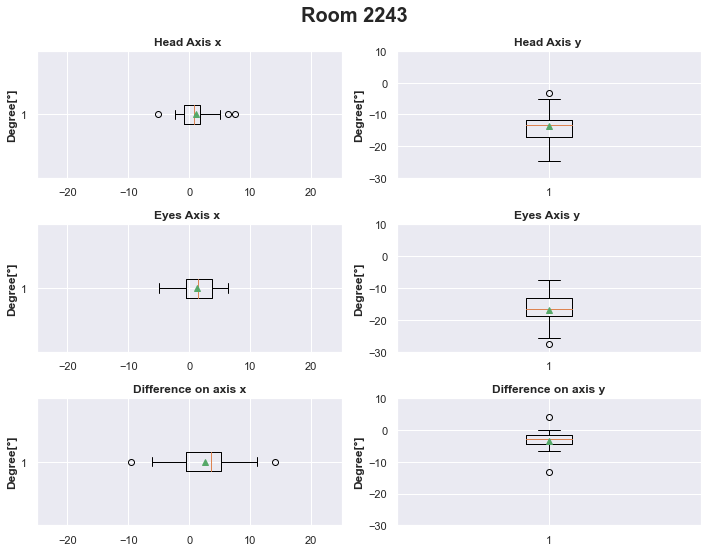

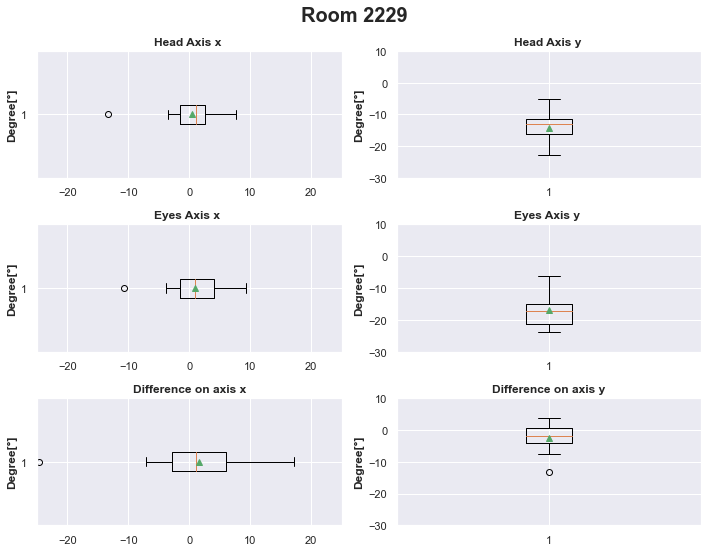

In [33]:
#2243
fig1=plt.figure(figsize=(10,10))
for i,j,n in zip(df_mean_all_2243.columns,
               ['Head Axis y ','Eyes Axis y ','Head Axis x ','Eyes Axis x ','Difference on axis y','Difference on axis x'],[2,4,1,3,6,5]):
    #base plot + polyfit
    plt.suptitle("Room 2243",fontsize=20,fontweight='bold')
    plt.subplot(4,2,n)
    invert_ax_bool= -1 if j in ['Eyes Axis x ','Eyes Axis y ','Head Axis y '] else 1
    vert= (" y" in j)
    diff= ("Difference" in j)
    plt.boxplot(invert_ax_bool*df_mean_all_2243[i],vert=vert,showmeans=True)
    if vert==True and ~diff:
        plt.ylim([-30,10])
    if vert==True and diff:
        plt.ylim([-30,10])
    if vert==False and diff:
        plt.xlim([-10,10])
    if vert==False and ~diff:
        plt.xlim([-25,25])
    plt.ylabel('Degree[°]',fontsize=12,fontweight='bold')
    plt.title(j,fontsize=12,fontweight='bold')
fig1.tight_layout()
plt.savefig('Figures/EyesHeadDir2243.jpg')

#2229
fig2=plt.figure(figsize=(10,10))
for i,j,n in zip(df_mean_all_2229.columns,
               ['Head Axis y ','Eyes Axis y ','Head Axis x ','Eyes Axis x ','Difference on axis y','Difference on axis x'],[2,4,1,3,6,5]):
    #base plot + polyfit
    plt.suptitle("Room 2229",fontsize=20,fontweight='bold')
    plt.subplot(4,2,n)
    invert_ax_bool= -1 if j in ['Eyes Axis x ','Eyes Axis y ','Head Axis y '] else 1
    diff= ("Difference" in j)
    vert= (" y" in j)
    plt.boxplot(invert_ax_bool*df_mean_all_2229[i],vert=vert,showmeans=True)
    if vert==True and ~diff:
        plt.ylim([-30,10])
    if vert==True and diff:
        plt.ylim([-30,10])
    if vert==False and diff:
        plt.xlim([-10,10])
    if vert==False and ~diff:
        plt.xlim([-25,25])
    plt.ylabel('Degree[°]',fontsize=12,fontweight='bold')
    plt.title(j,fontsize=12,fontweight='bold')
fig2.tight_layout()
plt.savefig('Figures/EyesHeadDir2229.jpg')
plt.show()

In [34]:
df_mean_all_2243.head(3)

,Axis_y_head,Axis_y_eyes,Axis_x_head,Axis_x_eyes,Axis_y_diff,Axis_x_diff
2243//webcam_2021-05-25-14-13.csv,12.286560,16.732433,-5.145247,4.947059,-4.541093,-9.616670
2243//webcam_2021-05-25-15-00.csv,14.080828,16.386446,0.595117,0.592920,-2.054858,-0.427335
2243//webcam_2021-05-25-16-28.csv,17.948165,21.451406,6.449382,-3.694261,-2.895564,10.632473


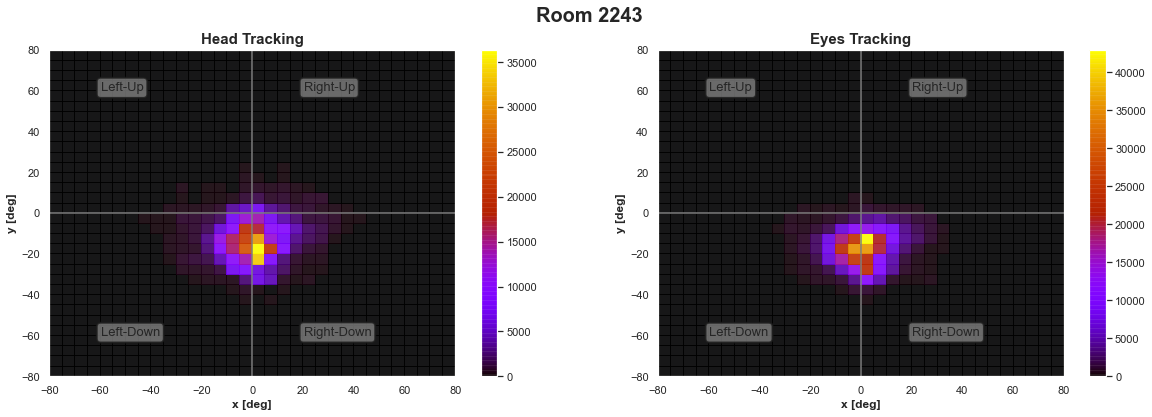

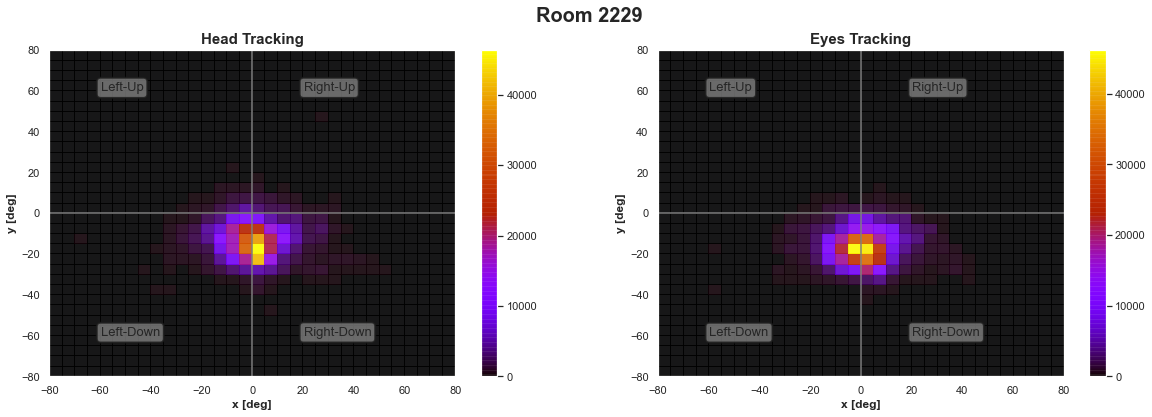

In [35]:
# 2243
#plot head /eyes position 
bbox = dict(boxstyle = "round", facecolor = 'grey',edgecolor = 'k',lw = 2, alpha = 0.8)
offset = 1

fig=plt.figure(figsize=(20, 6))
plt.suptitle("Room 2243",fontsize=20,fontweight='bold')
plt.subplot(1,2,1)
plt.hist2d(x=df_ws_deg_full_2243[' pose_Ry'],y=-df_ws_deg_full_2243[' pose_Rx'], bins=np.arange(-80, 80 + 5, 5),cmap="gnuplot",alpha=0.9)
plt.colorbar()# 32 square of 5 degree each bins=53.5->3 degree et 80 pour 2degree
plt.title('Head Tracking',fontsize=15,fontweight='bold')
plt.xlim(-80, 80)
plt.ylim(-80,80)
plt.xlabel("x [deg]",fontweight='bold')
plt.ylabel("y [deg]",fontweight='bold')
plt.axvline(0, linestyle = '-', color = 'grey')
plt.axhline(0, linestyle = '-', color = 'grey')
plt.annotate('Right-Up'.format(20,60),
            (20,60), xytext=(0.6*offset, -0.1*offset), textcoords='offset points',
            bbox=bbox,fontsize=13)
plt.annotate('Left-Up'.format(-60,60),
            (-60,60), xytext=(0.6*offset, -0.1*offset), textcoords='offset points',
            bbox=bbox,fontsize=13)
plt.annotate('Right-Down'.format(20,-60),
            (20,-60), xytext=(0.6*offset, -0.1*offset), textcoords='offset points',
            bbox=bbox,fontsize=13)
plt.annotate('Left-Down'.format(-60,-60),
            (-60,-60), xytext=(0.6*offset, -0.1*offset), textcoords='offset points',
            bbox=bbox,fontsize=13)
                
#plot eyes position
plt.subplot(1,2,2)
plt.hist2d(x=-df_ws_deg_full_2243[' gaze_angle_x'],y=-df_ws_deg_full_2243[' gaze_angle_y'], bins=np.arange(-80, 80 + 5, 5),cmap="gnuplot",alpha=0.9) # 32 square of 5 degree each bins=53.5
plt.colorbar()
plt.title('Eyes Tracking',fontsize=15,fontweight='bold')
plt.xlim(-80, 80)
plt.ylim(-80,80)
plt.xlabel("x [deg]",fontweight='bold')
plt.ylabel("y [deg]",fontweight='bold')
plt.axvline(0, linestyle = '-', color = 'grey')
plt.axhline(0, linestyle = '-', color = 'grey')
plt.annotate('Right-Up'.format(20,60),
            (20,60), xytext=(0.6*offset, -0.1*offset), textcoords='offset points',
            bbox=bbox,fontsize=13)
plt.annotate('Left-Up'.format(-60,60),
            (-60,60), xytext=(0.6*offset, -0.1*offset), textcoords='offset points',
            bbox=bbox,fontsize=13)
plt.annotate('Right-Down'.format(20,-60),
            (20,-60), xytext=(0.6*offset, -0.1*offset), textcoords='offset points',
            bbox=bbox,fontsize=13)
plt.annotate('Left-Down'.format(-60,-60),
            (-60,-60), xytext=(0.6*offset, -0.1*offset), textcoords='offset points',
            bbox=bbox,fontsize=13)
plt.savefig('Figures/HeatMap2243.jpg')
plt.show()

# 2229
fig=plt.figure(figsize=(20, 6))
plt.suptitle("Room 2229",fontsize=20,fontweight='bold')
plt.subplot(1,2,1)
plt.hist2d(x=df_ws_deg_full_2229[' pose_Ry'],y=-df_ws_deg_full_2229[' pose_Rx'], bins=np.arange(-80, 80 + 5, 5),cmap="gnuplot",alpha=0.9)
plt.colorbar()# 32 square of 5 degree each bins=53.5->3 degree et 80 pour 2degree
plt.title('Head Tracking',fontsize=15,fontweight='bold')
plt.xlim(-80, 80)
plt.ylim(-80,80)
plt.xlabel("x [deg]",fontweight='bold')
plt.ylabel("y [deg]",fontweight='bold')
plt.axvline(0, linestyle = '-', color = 'grey')
plt.axhline(0, linestyle = '-', color = 'grey')
plt.annotate('Right-Up'.format(20,60),
            (20,60), xytext=(0.6*offset, -0.1*offset), textcoords='offset points',
            bbox=bbox,fontsize=13)
plt.annotate('Left-Up'.format(-60,60),
            (-60,60), xytext=(0.6*offset, -0.1*offset), textcoords='offset points',
            bbox=bbox,fontsize=13)
plt.annotate('Right-Down'.format(20,-60),
            (20,-60), xytext=(0.6*offset, -0.1*offset), textcoords='offset points',
            bbox=bbox,fontsize=13)
plt.annotate('Left-Down'.format(-60,-60),
            (-60,-60), xytext=(0.6*offset, -0.1*offset), textcoords='offset points',
            bbox=bbox,fontsize=13)
                
#plot eyes position
plt.subplot(1,2,2)
plt.hist2d(x=-df_ws_deg_full_2229[' gaze_angle_x'],y=-df_ws_deg_full_2229[' gaze_angle_y'], bins=np.arange(-80, 80 + 5, 5),cmap="gnuplot",alpha=0.9) # 32 square of 5 degree each bins=53.5->3 degree et 80 pour 2degree
plt.colorbar()
plt.title('Eyes Tracking',fontsize=15,fontweight='bold')
plt.xlim(-80, 80)
plt.ylim(-80,80)
plt.xlabel("x [deg]",fontweight='bold')
plt.ylabel("y [deg]",fontweight='bold')
plt.axvline(0, linestyle = '-', color = 'grey')
plt.axhline(0, linestyle = '-', color = 'grey')
plt.annotate('Right-Up'.format(20,60),
            (20,60), xytext=(0.6*offset, -0.1*offset), textcoords='offset points',
            bbox=bbox,fontsize=13)
plt.annotate('Left-Up'.format(-60,60),
            (-60,60), xytext=(0.6*offset, -0.1*offset), textcoords='offset points',
            bbox=bbox,fontsize=13)
plt.annotate('Right-Down'.format(20,-60),
            (20,-60), xytext=(0.6*offset, -0.1*offset), textcoords='offset points',
            bbox=bbox,fontsize=13)
plt.annotate('Left-Down'.format(-60,-60),
            (-60,-60), xytext=(0.6*offset, -0.1*offset), textcoords='offset points',
            bbox=bbox,fontsize=13)
plt.savefig('Figures/HeatMap2229.jpg')
plt.show()

# Survey analysis

First, we need our stastistic on both room:

In [36]:
display(df_stat_2243_.head(1))
display(df_stat_2229_.head(1))

,Survey 1 Dmean pupil,Cognitive test 1 Dmean pupil,Cognitive test 2 Dmean pupil,Cognitive test 3 Dmean pupil,Creative test Dmean pupil,Survey 2 Dmean pupil,Blink mean Survey 1,Total time of Survey 1,Ratio kept Survey 1,Blink mean Cognitive test 1,...,Total time of Creative test,Ratio kept Creative test,Blink mean Survey 2,Total time of Survey 2,Ratio kept Survey 2,exposure_nr,session_ID,ratio_kept_rows,Number of rows total,Number of rows kept
webcam_2021-05-25-14-13.csv,5.391108,5.519426,5.487253,5.408561,5.452919,5.40009,23.328244,3 min0 sec,20.0043630017452,16.638093,...,4 min53 sec,70.54872639716132,7.960824,3 min52 sec,55.22734815798208,307_NG_1_Clear,13,50.855384,66929,34037.0


,Survey 1 Dmean pupil,Cognitive test 1 Dmean pupil,Cognitive test 2 Dmean pupil,Cognitive test 3 Dmean pupil,Creative test Dmean pupil,Survey 2 Dmean pupil,Blink mean Survey 1,Total time of Survey 1,Ratio kept Survey 1,Blink mean Cognitive test 1,...,Total time of Creative test,Ratio kept Creative test,Blink mean Survey 2,Total time of Survey 2,Ratio kept Survey 2,exposure_nr,session_ID,ratio_kept_rows,Number of rows total,Number of rows kept
webcam_2021-05-25-14-05.csv,5.184129,5.325886,5.427237,5.267589,5.305594,5.136859,2.015176,3 min0 sec,82.70577933450087,14.459235,...,5 min6 sec,93.57867067217424,0.55287,3 min50 sec,94.36929320257018,308_NG_1_Blurr,15,69.397059,68000,47190.0


Then we can import data from the surveys:

In [37]:
#import df clean from our preprocessing
df_srvey=pd.read_csv("Data/survey_clean.csv")
df_srvey.head(1)

,Unnamed: 0,p_ID,unique_qu_ID,visual_comfort,glare_Osterhaus,glare_binary,exposure_nr
0,0,301,301_NG_1_Clear_q1,Comfortable,Noticeable,No,301_NG_1_Clear


Then, we can merge our survey with each dataset df_stat_2243_ and df_stat_2229_ and compare with the weather 

In [38]:
df_2243_surv=df_stat_2243_.merge(df_srvey,on="exposure_nr").drop(columns='exposure_nr')
df_2229_surv=df_stat_2229_.merge(df_srvey,on="exposure_nr").drop(columns='exposure_nr')

In [39]:
df_2243_surv.head(1)

,Survey 1 Dmean pupil,Cognitive test 1 Dmean pupil,Cognitive test 2 Dmean pupil,Cognitive test 3 Dmean pupil,Creative test Dmean pupil,Survey 2 Dmean pupil,Blink mean Survey 1,Total time of Survey 1,Ratio kept Survey 1,Blink mean Cognitive test 1,...,session_ID,ratio_kept_rows,Number of rows total,Number of rows kept,Unnamed: 0,p_ID,unique_qu_ID,visual_comfort,glare_Osterhaus,glare_binary
0,5.391108,5.519426,5.487253,5.408561,5.452919,5.40009,23.328244,3 min0 sec,20.0043630017452,16.638093,...,13,50.855384,66929,34037.0,24,307,307_NG_1_Clear_q1,Comfortable,Noticeable,No


Finally, we can import the data about the weather and merge them to create two new dataset : ( df_stat_weather_2243 and df_stat_weather_2229 ) to verify that all the csv are able to be compare with the weather.

In [40]:
weather=pd.read_csv("Data/weather_only.csv")
weather_=weather[['unique_qu_ID','qu_usable']]
weather.head(1)

,session_number,condition,exposure_nr,siblings,Dev<25,qu_usable,qu1_qu2,qu_nr,unique_qu_ID
0,1.0,NG,301_NG_1_Clear,131,no,no,1,1,301_NG_1_Clear_q1


In [41]:
df_stat_weather_2243=df_2243_surv.merge(weather_,on='unique_qu_ID')
df_stat_weather_2229=df_2229_surv.merge(weather_,on='unique_qu_ID')

In [42]:
df_stat_weather_2243['qu_usable'].unique()

array(['yes'], dtype=object)

## 1. Glare Analysis

We want to now compare our dataset regrouping our stats with the glare. Note that as the measurement of weather are taken just after the survey 1 and 2, only those two tests are taken into account

In [43]:
COLUMNS=['Survey 1 Dmean pupil', 'Survey 2 Dmean pupil','Blink mean Survey 1','Blink mean Survey 2', 'unique_qu_ID','visual_comfort', 'glare_Osterhaus', 'glare_binary','dgp']

In [44]:
glare=pd.read_csv("Data/data_exposure_survey_with_objective_glare.csv")[['unique_qu_ID','dgp']]

In [45]:
#clean the non definite values
glare_clean=glare[glare.dgp.isnull()==False]

In [46]:
df_stat_glare_2243=df_2243_surv.merge(glare_clean,on='unique_qu_ID')[COLUMNS]
df_stat_glare_2229=df_2229_surv.merge(glare_clean,on='unique_qu_ID')[COLUMNS]

In [47]:
df_stat_glare_2243.head(1)

,Survey 1 Dmean pupil,Survey 2 Dmean pupil,Blink mean Survey 1,Blink mean Survey 2,unique_qu_ID,visual_comfort,glare_Osterhaus,glare_binary,dgp
0,5.391108,5.40009,23.328244,7.960824,307_NG_1_Clear_q1,Comfortable,Noticeable,No,0.255119


In [48]:
# Masks
r2243_mask1=df_stat_glare_2243['unique_qu_ID'].str.endswith('1')#take only the question 1 done after the survey 1
r2229_mask1=df_stat_glare_2229['unique_qu_ID'].str.endswith('1')#take only the question 1 done after the survey 1

r2243_mask2=df_stat_glare_2243['unique_qu_ID'].str.endswith('2')#take only the question 2 done after the survey 2
r2229_mask2=df_stat_glare_2229['unique_qu_ID'].str.endswith('2')#take only the question 2 done after the survey 2

In [49]:
# Room 2243
df_stat_survey2_2243=df_stat_glare_2243[r2243_mask2].reset_index().drop(['index'],axis=1)
df_stat_survey2_2243['Survey 1 Dmean pupil']=df_stat_survey2_2243['Survey 2 Dmean pupil']
df_stat_survey2_2243["Blink mean Survey 1"]=df_stat_survey2_2243["Blink mean Survey 2"]
# Room 2229
df_stat_survey2_2229=df_stat_glare_2229[r2229_mask2].reset_index().drop(['index'],axis=1)
df_stat_survey2_2229['Survey 1 Dmean pupil']=df_stat_survey2_2229['Survey 2 Dmean pupil']
df_stat_survey2_2229["Blink mean Survey 1"]=df_stat_survey2_2229["Blink mean Survey 2"]

In [50]:
#Room 2243
df_stat_survey_2243=pd.concat([df_stat_glare_2243[r2243_mask1],df_stat_survey2_2243],axis=0).reset_index()\
.rename({'Survey 1 Dmean pupil':'Dmean pupil Survey One/Two'},axis=1)\
.rename({"Blink mean Survey 1":'Blink mean Survey One/Two'},axis=1)\
.drop(['index','Survey 2 Dmean pupil','Blink mean Survey 2'],axis=1)
#Room 2229
df_stat_survey_2229=pd.concat([df_stat_glare_2229[r2229_mask1],df_stat_survey2_2229],axis=0).reset_index()\
.rename({'Survey 1 Dmean pupil':'Dmean pupil Survey One/Two'},axis=1)\
.rename({"Blink mean Survey 1":'Blink mean Survey One/Two'},axis=1)\
.drop(['index','Survey 2 Dmean pupil','Blink mean Survey 2'],axis=1)

In [51]:
display(df_stat_survey_2243.head(1))
display(df_stat_survey_2229.head(1))

,Dmean pupil Survey One/Two,Blink mean Survey One/Two,unique_qu_ID,visual_comfort,glare_Osterhaus,glare_binary,dgp
0,5.391108,23.328244,307_NG_1_Clear_q1,Comfortable,Noticeable,No,0.255119


,Dmean pupil Survey One/Two,Blink mean Survey One/Two,unique_qu_ID,visual_comfort,glare_Osterhaus,glare_binary,dgp
0,5.184129,2.015176,308_NG_1_Blurr_q1,Very comfortable,Imperceptible,No,0.23408


In [52]:
display('2229:',df_stat_survey_2243['dgp'].describe())
display('2243:',df_stat_survey_2229['dgp'].describe())

'2229:'

count    24.000000
mean      0.455688
std       0.104611
min       0.253608
25%       0.402100
50%       0.492602
75%       0.546319
max       0.570468
Name: dgp, dtype: float64

'2243:'

count    33.000000
mean      0.462460
std       0.101417
min       0.234080
25%       0.418847
50%       0.471054
75%       0.535785
max       0.633781
Name: dgp, dtype: float64

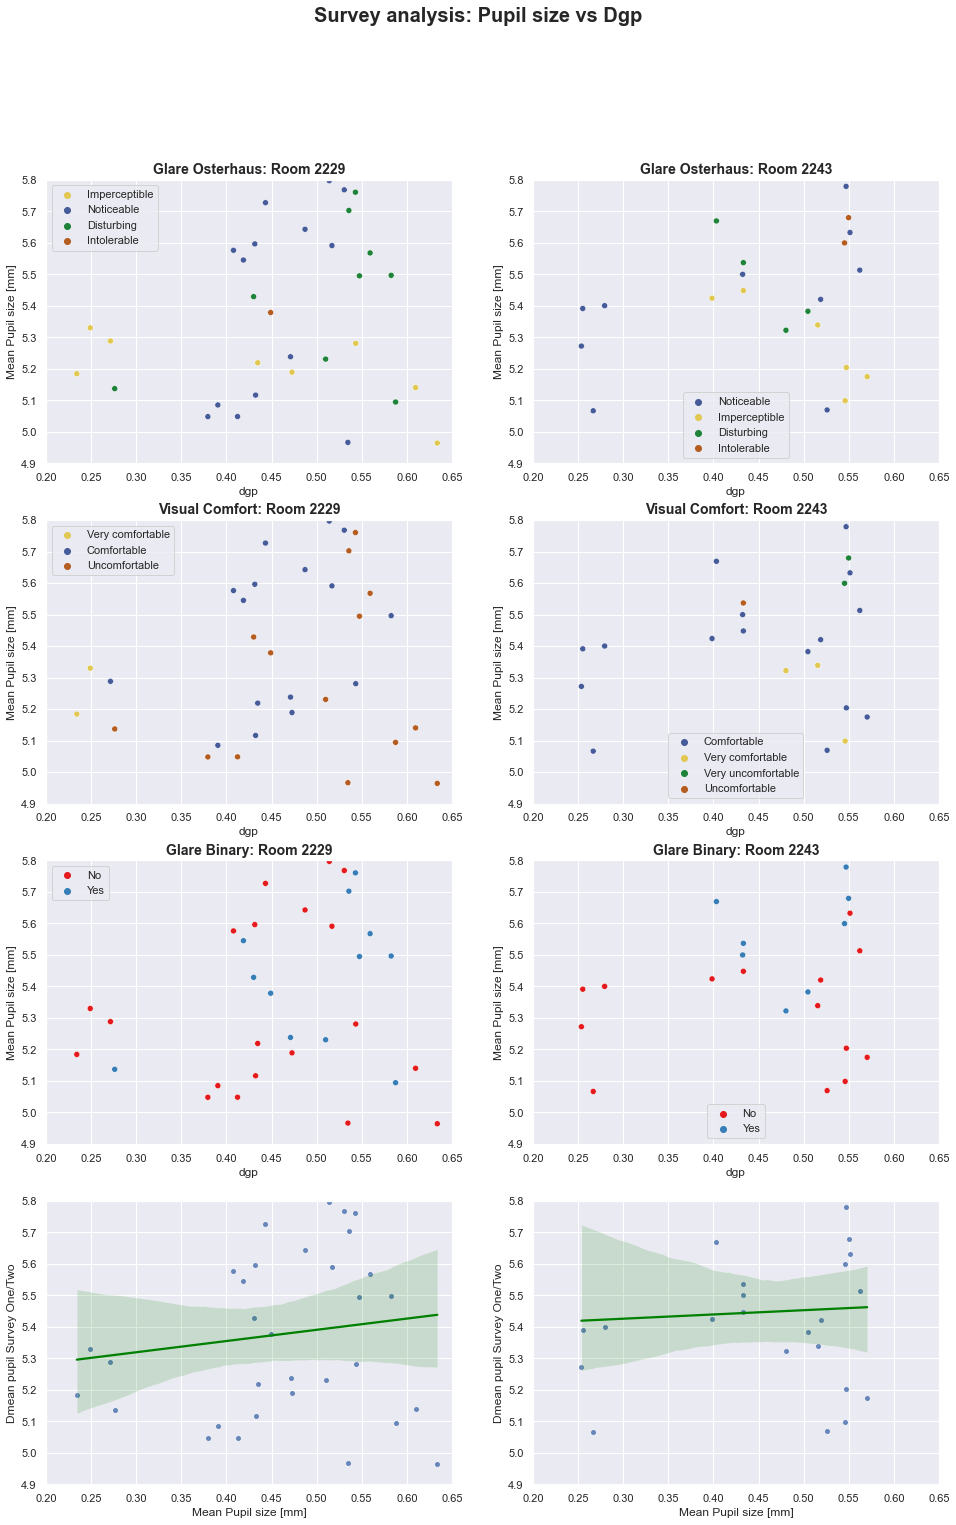

In [57]:
# Dmean pupil plot
fig = plt.figure(figsize=[16,24])
ax1 = fig.add_subplot(421)
ax2 = fig.add_subplot(422)
ax3 = fig.add_subplot(423)
ax4 = fig.add_subplot(424)
ax5 = fig.add_subplot(427)
ax6 = fig.add_subplot(428)
ax7 = fig.add_subplot(425)
ax8 = fig.add_subplot(426)
pal = {"Imperceptible":"#E0C853","Noticeable":"#465B9A","Disturbing":"#1E8339","Intolerable":"#B55C20"}
pal2= {"Very comfortable":"#E0C853","Comfortable":"#465B9A","Uncomfortable":"#B55C20","Very uncomfortable":"#1E8339"}
sns.scatterplot(y="Dmean pupil Survey One/Two", x="dgp",hue="glare_Osterhaus",palette=pal,data=df_stat_survey_2243,ax=ax2).set(ylabel="Mean Pupil size [mm]",ylim=[4.9,5.8],xlim=[0.20,0.65])
sns.scatterplot(y="Dmean pupil Survey One/Two", x="dgp",hue="glare_Osterhaus",palette=pal,data=df_stat_survey_2229,ax=ax1).set(ylabel="Mean Pupil size [mm]",ylim=[4.9,5.8],xlim=[0.20,0.65])
ax2.set_title("Glare Osterhaus: Room 2243",fontsize=14,fontweight='bold')
ax1.set_title("Glare Osterhaus: Room 2229",fontsize=14,fontweight='bold')
ax2.legend(loc='lower center')
ax1.legend(loc='upper left')

plt.suptitle("Survey analysis: Pupil size vs Dgp",fontsize=20,fontweight='bold')
sns.scatterplot(y="Dmean pupil Survey One/Two", x="dgp",hue="visual_comfort",palette=pal2,data=df_stat_survey_2243,ax=ax4).set(ylabel="Mean Pupil size [mm]",ylim=[4.9,5.8],xlim=[0.20,0.65])
sns.scatterplot(y="Dmean pupil Survey One/Two", x="dgp",hue="visual_comfort",palette=pal2,data=df_stat_survey_2229,ax=ax3).set(ylabel="Mean Pupil size [mm]",ylim=[4.9,5.8],xlim=[0.20,0.65])
ax4.set_title("Visual Comfort: Room 2243",fontsize=14,fontweight='bold')
ax3.set_title("Visual Comfort: Room 2229",fontsize=14,fontweight='bold')
ax4.legend(loc='lower center')
ax3.legend(loc='upper left')

sns.scatterplot(y="Dmean pupil Survey One/Two", x="dgp",hue="glare_binary",palette="Set1",data=df_stat_survey_2243,ax=ax8).set(ylabel="Mean Pupil size [mm]",ylim=[4.9,5.8],xlim=[0.20,0.65])
sns.scatterplot(y="Dmean pupil Survey One/Two", x="dgp",hue="glare_binary",palette="Set1",data=df_stat_survey_2229,ax=ax7).set(ylabel="Mean Pupil size [mm]",ylim=[4.9,5.8],xlim=[0.20,0.65])
ax8.set_title("Glare Binary: Room 2243",fontsize=14,fontweight='bold')
ax7.set_title("Glare Binary: Room 2229",fontsize=14,fontweight='bold')
ax8.legend(loc='lower center')
ax7.legend(loc='upper left')

sns.regplot(y='Dmean pupil Survey One/Two', x='dgp',data=df_stat_survey_2243.drop(["unique_qu_ID","visual_comfort","glare_Osterhaus","glare_binary"],axis=1).astype(float), scatter_kws={"s":15}, line_kws={"color": "green"},ax=ax6).set(xlabel="Mean Pupil size [mm]",ylim=[4.9,5.8],xlim=[0.20,0.65])
sns.regplot(y='Dmean pupil Survey One/Two', x='dgp',data=df_stat_survey_2229.drop(["unique_qu_ID","visual_comfort","glare_Osterhaus","glare_binary"],axis=1).astype(float), scatter_kws={"s":15}, line_kws={"color": "green"},ax=ax5).set(xlabel="Mean Pupil size [mm]",ylim=[4.9,5.8],xlim=[0.20,0.65])

plt.savefig('Figures/PupilSizevsDGP.jpg')
plt.show()

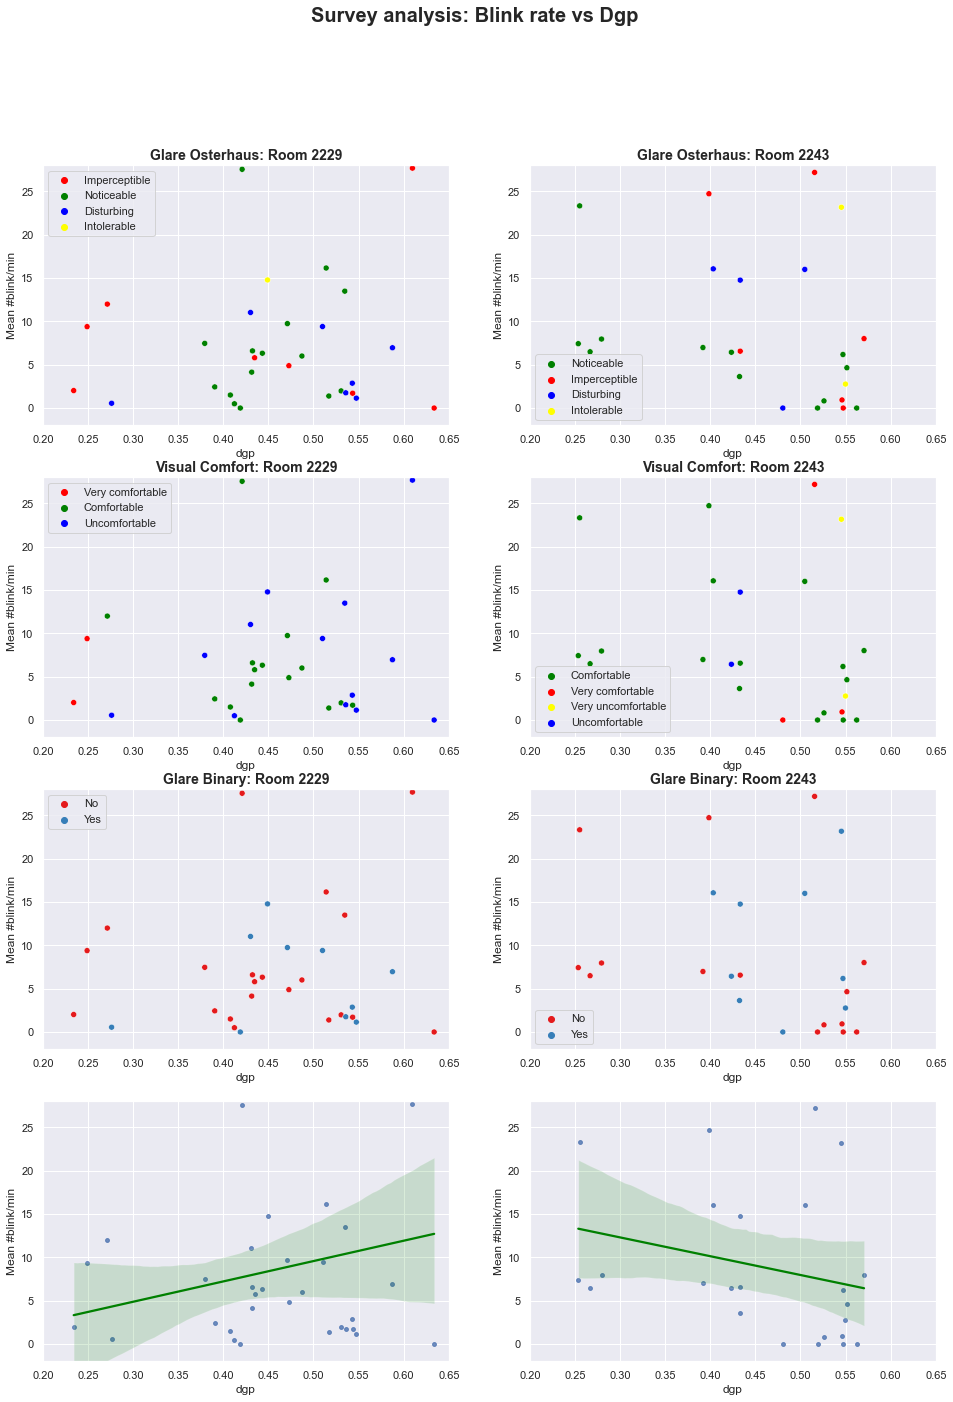

In [56]:
# blink rate plot

fig = plt.figure(figsize=[16,22])
ax1 = fig.add_subplot(421)
ax2 = fig.add_subplot(422)
ax3 = fig.add_subplot(423)
ax4 = fig.add_subplot(424)
ax5 = fig.add_subplot(427)
ax6 = fig.add_subplot(428)
ax7 = fig.add_subplot(425)
ax8 = fig.add_subplot(426)
pal = {"Imperceptible":"red","Noticeable":"green","Disturbing":"blue","Intolerable":"yellow"}
pal2= {"Very comfortable":"red","Comfortable":"green","Uncomfortable":"blue","Very uncomfortable":"yellow"}
plt.suptitle("Survey analysis: Blink rate vs Dgp",fontsize=20,fontweight='bold')
sns.scatterplot(y="Blink mean Survey One/Two", x="dgp",hue="glare_Osterhaus",palette=pal,data=df_stat_survey_2243,ax=ax2).set(ylabel="Mean #blink/min",ylim=[-2,28],xlim=[0.20,0.65])
sns.scatterplot(y="Blink mean Survey One/Two", x="dgp",hue="glare_Osterhaus",palette=pal,data=df_stat_survey_2229,ax=ax1).set(ylabel="Mean #blink/min",ylim=[-2,28],xlim=[0.20,0.65])
ax2.set_title("Glare Osterhaus: Room 2243",fontsize=14,fontweight='bold')
ax1.set_title("Glare Osterhaus: Room 2229",fontsize=14,fontweight='bold')
ax2.legend(loc='lower left')
ax1.legend(loc='upper left')

sns.scatterplot(y="Blink mean Survey One/Two", x="dgp",hue="visual_comfort",palette=pal2,data=df_stat_survey_2243,ax=ax4).set(ylabel="Mean #blink/min",ylim=[-2,28],xlim=[0.20,0.65])
sns.scatterplot(y="Blink mean Survey One/Two", x="dgp",hue="visual_comfort",palette=pal2,data=df_stat_survey_2229,ax=ax3).set(ylabel="Mean #blink/min",ylim=[-2,28],xlim=[0.20,0.65])
ax4.set_title("Visual Comfort: Room 2243",fontsize=14,fontweight='bold')
ax3.set_title("Visual Comfort: Room 2229",fontsize=14,fontweight='bold')
ax4.legend(loc='lower left')
ax3.legend(loc='upper left')

sns.scatterplot(y="Blink mean Survey One/Two", x="dgp",hue="glare_binary",palette="Set1",data=df_stat_survey_2243,ax=ax8).set(ylabel="Mean #blink/min",ylim=[-2,28],xlim=[0.20,0.65])
sns.scatterplot(y="Blink mean Survey One/Two", x="dgp",hue="glare_binary",palette="Set1",data=df_stat_survey_2229,ax=ax7).set(ylabel="Mean #blink/min",ylim=[-2,28],xlim=[0.20,0.65])
ax8.set_title("Glare Binary: Room 2243",fontsize=14,fontweight='bold')
ax7.set_title("Glare Binary: Room 2229",fontsize=14,fontweight='bold')
ax8.legend(loc='lower left')
ax7.legend(loc='upper left')

sns.regplot(y="Blink mean Survey One/Two", x='dgp',data=df_stat_survey_2243.drop(["unique_qu_ID","visual_comfort","glare_Osterhaus","glare_binary"],axis=1).astype(float), scatter_kws={"s":15}, line_kws={"color": "green"},ax=ax6).set(ylabel="Mean #blink/min",ylim=[-2,28],xlim=[0.20,0.65])
sns.regplot(y="Blink mean Survey One/Two", x='dgp',data=df_stat_survey_2229.drop(["unique_qu_ID","visual_comfort","glare_Osterhaus","glare_binary"],axis=1).astype(float), scatter_kws={"s":15}, line_kws={"color": "green"},ax=ax5).set(ylabel="Mean #blink/min",ylim=[-2,28],xlim=[0.20,0.65])

plt.savefig('Figures/BlinkvsDGP.jpg')
plt.show()